# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore

import spacy


In [2]:
# Load dataset
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
results = pd.DataFrame()

In [3]:
data.head(10)

,0,1
0,I was thrilled to be back in the Great city of...,True
1,The Unsolicited Mail In Ballot Scam is a major...,True
2,"As long as I am President, I will always stand...",True
3,"Our Economy is doing great, and is ready to se...",True
4,If I do not sound like a typical Washington po...,True
5,"...For years, I watched one betrayal after ano...",True
6,On the 37th anniversary of the horrendous atta...,True
7,"Joe Biden’s response to the H1N1 Swine Flu, fa...",True
8,"Pennsylvania Ballot “mistakes” made, in my opi...",True
9,"Congratulations to for his dogged pursuit, as ...",True


## Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

In [4]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data[0].values, data[1].values, test_size=0.2, random_state=18)

# Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

## Approach TFIDF using Logistic Regression

In [5]:
# vectorizing
TfidfVectorizer_concrete =TfidfVectorizer()
X_train_TFIDF_vectors = TfidfVectorizer_concrete.fit_transform(X_train)
X_test_TFIDF_vectors = TfidfVectorizer_concrete.transform(X_test)
# Transform the test-set

In [6]:
model = LogisticRegression(max_iter=2000)

In [7]:
# training the model with the TFIDF vectors
model.fit(X_train_TFIDF_vectors, y_train)

LogisticRegression(max_iter=2000)

In [8]:
score = model.score(X_test_TFIDF_vectors, y_test)
score

0.8171641791044776

In [9]:
# Check performance of the model
results = results.append({'TDIDF logit': score}, ignore_index=True)

In [10]:
results

,TDIDF logit
0,0.817164


## Approach BoW using Logistic Regression

In [11]:
vectorizer = CountVectorizer()
X_train_BoW_vec = vectorizer.fit_transform(X_train)
X_test_BoW_vec = vectorizer.transform(X_test)

In [12]:
# training the model with the BoW vectors
model.fit(X_train_BoW_vec, y_train)

LogisticRegression(max_iter=2000)

In [13]:
score = model.score(X_test_BoW_vec, y_test)
score

0.8063093622795116

In [14]:
results = results.append({'BoW logit': score}, ignore_index=True)

So far: TDIDF performs better than using BoW when using a logistic regression classifier

# Alternatives models
I will now try to use TFIDF approaches with another classifier than logistic regression

## TFIDF with RandomForest

In [15]:
model = RandomForestClassifier()

In [16]:
# training the RandomForrestClassifier model
model.fit(X_train_TFIDF_vectors, y_train)

RandomForestClassifier()

In [17]:
# Check performance of the model
score = model.score(X_test_TFIDF_vectors, y_test)
score

0.8497286295793759

In [18]:
results = results.append({'Random Forest': score}, ignore_index=True)

We perform better with RandomForest! Lets try another one.

## TFIDF with SVM

In [19]:
model = svm.SVC(kernel='linear')

In [20]:
# training the RandomForrestClassifier model
model.fit(X_train_TFIDF_vectors, y_train)

SVC(kernel='linear')

In [21]:
# Check performance of the model
score = model.score(X_test_TFIDF_vectors, y_test)
score

0.8110583446404342

In [22]:
results = results.append({'Linear SVM': score}, ignore_index=True)

In [23]:
model = svm.SVC(kernel='rbf')

In [24]:
model.fit(X_train_TFIDF_vectors, y_train)

SVC()

In [25]:
score = model.score(X_test_TFIDF_vectors, y_test)
score

0.85719131614654

In [26]:
results = results.append({'Kernel SVM': score}, ignore_index=True)

The non-linear (rbf) SVM performs slightly better than RandomForest

## TFIDF with Neural network

In [27]:
model = MLPClassifier(solver='adam', alpha=1e-06, hidden_layer_sizes=(6, 1), random_state=1)

In [28]:
# training the Neural Network model
model.fit(X_train_TFIDF_vectors, y_train)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(6, 1), random_state=1)

In [29]:
# Check performance of the model
score = model.score(X_test_TFIDF_vectors, y_test)
score

0.7818860244233379

In [30]:
results = results.append({'MLP': score}, ignore_index=True)

<AxesSubplot:>

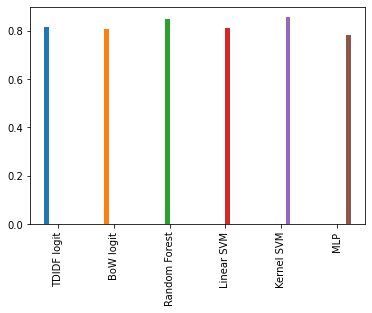

In [31]:
results.T.plot(kind='bar', legend = False)

# Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

In [32]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14736 entries, 0 to 14735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14736 non-null  object
 1   1       14736 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 244.6+ KB


In [34]:
# reindex
data.index = range(len(data))

In [35]:
tokens = []

for text in nlp.pipe(data[0]):
  proj_tok = [token.lemma_.lower() for token in text if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [36]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(tokens)

In [37]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [38]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in tokens]

In [39]:
# That's how the corpus looks
corpus[3][:10]

[(5, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]

In [40]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=10, workers = 4, passes=10)

In [41]:
lda_model.print_topics(-1)

C:\Users\au589116\Anaconda3\envs\ICILS\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.049*"border" + 0.031*"wall" + 0.027*"democrats" + 0.022*"hillary" + 0.021*"fbi" + 0.020*"security" + 0.020*"clinton" + 0.019*"crime" + 0.019*"illegal" + 0.016*"campaign"'),
 (1,
  '0.046*"house" + 0.041*"big" + 0.034*"white" + 0.033*"great" + 0.029*"new" + 0.023*"@foxnews" + 0.019*"p.m." + 0.018*"tonight" + 0.017*"york" + 0.016*"night"'),
 (2,
  '0.060*"great" + 0.032*"people" + 0.031*"witch" + 0.031*"state" + 0.029*"hunt" + 0.019*"american" + 0.017*"governor" + 0.016*"court" + 0.015*"minister" + 0.014*"prime"'),
 (3,
  '0.034*"people" + 0.029*"country" + 0.026*"job" + 0.024*"trump" + 0.023*"great" + 0.022*"president" + 0.017*"high" + 0.016*"u.s." + 0.014*"federal" + 0.014*"donald"'),
 (4,
  '0.058*"democrats" + 0.047*"amp" + 0.041*"radical" + 0.036*"left" + 0.026*"biden" + 0.026*"joe" + 0.021*"democrat" + 0.021*"party" + 0.021*"republicans" + 0.017*"impeachment"'),
 (5,
  '0.089*"great" + 0.036*"#" + 0.023*"maga" + 0.022*"trump2016" + 0.020*"people" + 0.020*"military" + 0.01

In [42]:
# Let's try to visualize
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

C:\Users\au589116\Anaconda3\envs\ICILS\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# Let's Visualize
pyLDAvis.display(lda_display)

C:\Users\au589116\Anaconda3\envs\ICILS\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
